University of Zagreb<br/>
Faculty of Electrical Engineering and Computing<br/>
Department of Electronic Systems and Information Processing

Academic year 2020/2021

## **3rd laboratory exercise: Image transforms**

*Digital Image Processing and Analysis* (183463)

Date: 2022-03-10

Please send any feedback (corrections, comments, suggestions etc.) regarding this document to franko.sikic@fer.hr.

© University of Zagreb Faculty of Electrical Engineering and Computing, 2021.

Permission is granted to make and distribute copies of this instructions provided the copyright notice and this permission notice are preserved on all copies.

# Introduction

Instructions for laboratory exercises for the course *Digital Image Processing and Analysis* are prepared in a form of a <a href="https://jupyter.org/">Jupyter</a> notebooks.

All problems in prepared notebook are intended to be completed in Python using <a href="https://colab.research.google.com">Google Colaboratory</a> platform (Colab for short).

## How to Submit Your Laboratory Report

Simply write-in your code to all empty code cells and write in your answers to the text cells with questions.

Empty code cells contain the placeholder text `# Write-in your solution` while text cells where you have to write-in someting contain a bold uppercase text **WRITE YOUR ANSWER HERE**.

Once you have completed all problems save this notebook locally in a file named DIPA_LAB_X_NAME_SURNAME.ipynb,
where X is the exercise number, and submit it via Moodle under the appropriate upload section.

Your submissions will be first automatically re-evaluated which corresponds to selecting the *Runtime/Restart and run all* command in Colab. Therefore, it is strongly suggested that you run this command yourself before submitting your notebook. Another thing to do before submission is to clear all the cell outputs by selecting *Edit/Clear all outputs*. This will reduce the size of .ipynb files for upload.

## Student Information

Before proceeding double click on this text and then fill in your name:

Name: Enio Krizman
Student ID number (JMBAG): 0069083848

## Suggested Reading

### General Reading

If you are not familiar with Python then start with a Python tutorial such as e.g. an official one available at <a href="https://docs.python.org/3/tutorial/">https://docs.python.org/3/tutorial/</a>.

Jupyter notebooks are relying on <a href="https://ipython.org/">IPython</a>, which is an interactive Python interpreter. Jupyter notebooks may be run locally or they may be conveniently executed remotely in Google Colaboratory via web browser.

Readers familiar with Matlab who have only basic knowledge of Python are strongly encouraged to read the document <a href="https://numpy.org/doc/stable/user/numpy-for-matlab-users.html">NumPy for Matlab users</a> before attempting to solve this laboratory exercise in Colab.

### Image Processing in Python

Some general image processing functions are available as a part of [`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html). This basic functionality is extended by the [`scikit-image`](https://scikit-image.org/). We will also use [OpenCV](https://opencv.org/).

#Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Importing Required Functions

To simplify the code in Python in this notebook we may deliberately import functions from <a href="https://www.scipy.org/">SciPy</a>, <a href="https://numpy.org/">NumPy</a> and <a href="https://matplotlib.org/">Matplotlib</a> directly into the global namespace so e.g. we can write `fft` instead of `scipy.fft.fft`.

Please keep in mind that such an approach may be tolerated for the purpose of a short laboratory exercise where risks of collisions and side effects are minimal. It is best always avoided in production code.

If you prefer to use namespaces then feel free to change the import statements to retain strict package separation, e.g. `import numpy as np`.

In [ ]:
# Import packages
import cv2
import skimage.io

# To display images in browser
from google.colab.patches import cv2_imshow

# Import some functions to the global namespace for convenience
from scipy.ndimage import *
from scipy.fft import *
from scipy.signal import * 
from scipy.stats import *
from skimage.filters import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import *
from PIL import Image

## Image loading

We will be using images from the [USC-SIPI database](http://sipi.usc.edu/database/) and additional images available on the [DIPA class webpage](https://www.fer.unizg.hr/en/course/dipaa_b/laboratory#%23!p_rep_139398!_-187329). To load any of these images, all we have to do is copy the URL of the image and write the following two lines of code.

In [ ]:
url = "http://sipi.usc.edu/database/preview/misc/5.3.02.png"
img = skimage.io.imread(url, plugin = 'pil')

## Image representations

[Grayscale](https://en.wikipedia.org/wiki/Grayscale) images are composed of pixels representing a grayscale value. In a computer a 2D grayscale image is represented as an $M \times N$ matrix of pixel values, which represent light intensity. 

It takes several such matrices for colored images - one for each color channel. There are several color models used for color image representation. For instance, an [RGB](https://en.wikipedia.org/wiki/RGB_color_model) image has three channels (for red, green and blue color) so an $M \times N \times 3$ matrix is used.   Color images can be converted to grayscale images, usually by calculating a weighted sum of the channels. The [cv2.cvtColor()](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) function is used to convert images from one color space to another.

These representations allow the use of common matrix operators for image processing and analysis. 

In [ ]:
url = "http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.07"
img = skimage.io.imread(url)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # openCV uses BGR (blue, green, red) representation
cv2_imshow(img)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

# 3.1 Discrete Fourier transform

One-dimensional discrete Fourier transform (DFT) of a signal x(n) is defined with the Eq. 3.1, and its inverse is defined with the Eq. 3.2:
\begin{equation}
X_k = \sum_{n=0}^{N-1}{x_n e^{-\frac{2\pi i}N kn}}, \qquad k = 0,...,N −1 \tag{3.1}
\end{equation}
\begin{equation}
x_n = \frac1N \sum_{k=0}^{N-1}{X_k e^{\frac{2\pi i}N kn}}, \qquad n = 0,...,N −1 \tag{3.2}
\end{equation}

If we define the matrix W as:
\begin{equation}
\mathbf{W}=\left[\begin{array}{cccc}
\omega_{N}^{0 \cdot 0} & \omega_{N}^{0 \cdot 1} & \ldots & \omega_{N}^{0 \cdot(N-1)} \\
\omega_{N}^{1 \cdot 0} & \omega_{N}^{1 \cdot 1} & \cdots & \omega_{N}^{1 \cdot(N-1)} \\
\vdots & \vdots & \ddots & \vdots \\
\omega_{N}^{(N-1) \cdot 0} & \omega_{N}^{(N-1) \cdot 1} & \ldots & \omega_{N}^{(N-1) \cdot(N-1)}
\end{array}\right]
\end{equation}

where $\omega_N = e^{-2\pi i/N}$, then the equations Eq. 3.1 and Eq. 3.2 can be rewritten in the matrix form:
\begin{equation} X = \mathbf{W}x \tag{3.3}\end{equation}   
\begin{equation} x = \mathbf{W}^{-1}X \tag{3.4}\end{equation} 

Two-dimensional DFT of an image $x(m,n)$ is defined by:
\begin{equation}
X(k, l)=\sum_{n=0}^{N-1} \sum_{m=0}^{M-1} x(m, n) e^{-\frac{2 \pi i}{N} k n} e^{-\frac{2 \pi i}{N} l m}, \quad k \in[0, N-1], l \in[0, M-1] \tag{3.5}
\end{equation}

From Eq. 3.5, it is easy to see that the 2D DFT is a separable transform:
\begin{equation}
X(k,l) = \sum_{n=0}^{N-1}{e^{-\frac{2\pi i}N kn}} \sum_{m=0}^{M-1}{e^{-\frac{2\pi i}N lm}} x(m,n) \tag{3.6}
\end{equation}

i.e., that it is a combination of two 1D-DFT transforms. Since DFT is commonly calculated using the fast Fourier transform algorithm (FFT), we can calculate the 2D DFT first by calculating 1D DFT for each row (this is the intermediate result), followed by 1D DFT of each column of the intermediate result. Such an algorithm to computation of 2D DFT is called the row-column method. The complexity of the row-column method is $O(N^2log_2N)$. 2D DFT can be  calculated using the function [scipy.fft.fft2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft2.html), as explained in the following example:

## Example:

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Images/klis2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Show the image
plt.figure(figsize = (8,8))
plt.imshow(img, cmap = 'gray')
plt.show()

# Compute Fourier transform
imgFT = fft2(img) 
imgFT = imgFT*2/np.prod(np.shape(imgFT)) 

# Shift central frequency (0) to image center for displaying - this isn't necessary but it can be visually more suitable
imgFT = fftshift(imgFT)  

# Compute the amplitude and phase spectra
A = np.log10(np.abs(imgFT)) # amplitude in dB
phi = np.angle(imgFT)

plt.figure(figsize = (8,8))
plt.imshow(A, cmap='gray')
plt.show()
plt.figure(figsize = (8,8))
plt.imshow(phi, cmap='gray')
plt.show()

Functions *fft()* and *fft2()* calculate the spectrum whose center is not in the middle of the obtained matrix, but in the upper left corner. If we want to display the results so that the origin is in the middle of the image, we need to apply the function  [*fftshift()*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftshift.html).

Usually DFT coefficients are scaled before displaying to see their correct values. But when displaying them as an image we want to normalize the image to be able to see the coefficients best. *plt.imshow* does that automatically, so there is no point in scaling the DFT coefficients. It is important to notice that **inputs of the functions *fft()* and *fft2()* should not be scaled or shifted!**

The spectrum which we calculated in our last example and saved in the variable imgFT is complex. Commonly, we display the complex spectrum by separately displaying the amplitude and the phase, which we define as:

\begin{equation}
A_{k}=\left|X_{k}\right|=\sqrt{\operatorname{Re}\left(X_{k}\right)^{2}+\operatorname{Im}\left(X_{k}\right)^{2}} \tag{3.07}
\end{equation}

\begin{equation}
\Phi_{k}=\arg \left(X_{k}\right)=\arctan \left(\operatorname{Im}\left(X_{k}\right), \operatorname{Re}\left(X_{k}\right)\right) \tag{3.08}
\end{equation}

Arctangent is a four quadrant function, so the signs (+/-) of real and imaginary part of the spectrum are relevant in the phase calculation. Since the differences between the coefficient values are commonly very large (up to several orders of magnitude), amplitude is usually displayed in decibels (dB), ie. the logarithm is applied to compress the dinamycal range of the values. 


### **3.1.1 Problems**
1. Select one image diplaying the natural scene (ie. klis.png) and one image of a texture (ie. uzorak.tif). Display their amplitudes and phases. Which part of the spectrum contains the largest portion of the energy?

In [ ]:
# Write-in your solution
img1 = cv2.imread("/content/drive/MyDrive/Images/klis1.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img1, cmap = 'gray')
plt.show()
img2 = cv2.imread("/content/drive/MyDrive/Images/uzorak.tif")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap = 'gray')
plt.show()

# Compute Fourier transform
imgFT1 = fft2(img1) 
#imgFT = imgFT*2/np.prod(np.shape(imgFT)) 

# Shift central frequency (0) to image center for displaying - this isn't necessary but it can be visually more suitable
imgFT1 = fftshift(imgFT1)  

# Compute the amplitude and phase spectra
A1 = np.log10(np.abs(imgFT1)) # amplitude in dB
phi1 = np.angle(imgFT1)

plt.figure(figsize = (8,8))
plt.imshow(A1, cmap='gray')
plt.show()
plt.figure(figsize = (8,8))
plt.imshow(phi1, cmap='gray')
plt.show()

# Compute Fourier transform
imgFT2 = fft2(img2) 
#imgFT = imgFT*2/np.prod(np.shape(imgFT)) 

# Shift central frequency (0) to image center for displaying - this isn't necessary but it can be visually more suitable
imgFT2 = fftshift(imgFT2)  

# Compute the amplitude and phase spectra
A2 = np.log10(np.abs(imgFT2)) # amplitude in dB
phi2 = np.angle(imgFT2)

plt.figure(figsize = (8,8))
plt.imshow(A2, cmap='gray')
plt.show()
plt.figure(figsize = (8,8))
plt.imshow(phi2, cmap='gray')
plt.show()

Sredina spektra sadrži najveći dio energije jer je večina energije spremljena u nižim frekvencijama spektra.

#3.2  2D DFT and the geometry transforms of the image

In this part of the exercise we will examine how do the basic geometry transforms such as scaling, rotation and translation of an image in the spatial domain affect its frequency spectrum. The scheme of the experiment is given in Fig. 3.1.

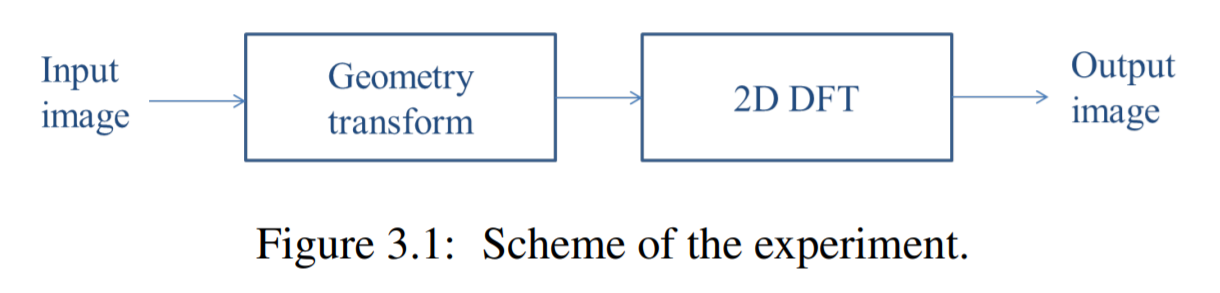



The size of the image can be varied with the function [cv2.resize()](https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d). Rotation of an image for an angle θ is achieved by the transformation matrix of the form

\begin{equation} M=\begin{bmatrix} cosθ & −sinθ \\ sinθ & cosθ \end{bmatrix} \end{equation}

OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. The modified transformation matrix is given by

\begin{equation} M=\begin{bmatrix} α & β & (1−α)⋅center.x−β⋅center.y\\ -β & α & β⋅center.x+(1−α)⋅center.y\end{bmatrix} \end{equation}
where:
\begin{equation} α=scale⋅cosθ \end{equation}
\begin{equation} β=scale⋅sinθ \end{equation}

To find this transformation matrix, OpenCV provides a function, [cv2.getRotationMatrix2D()](https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326). Such a matrix is then passed to the [cv.warpAffine()](https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983) function.

Translation is a geometric transformation which shifts image pizels by a certain amount. If you know the translation vector $(t_x,t_y)$, you can represent translation using the transformation matrix M as follows:
\begin{equation} M=\begin{bmatrix} 1 & 0 & t_x\\ 0 & 1 & t_y\end{bmatrix} \end{equation} and pass it into the cv.warpAffine() function.



## Example:

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Images/misal_1483.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
imgL = cv2.resize(img, (img.shape[0] * 2, img.shape[1] * 2), interpolation = cv2.INTER_LINEAR)     # increase the image size 2 times, bilinear interpolation
imgS = cv2.resize(img, (img.shape[0] //4, img.shape[1] //4), interpolation = cv2.INTER_LINEAR)     # reduce the image size 4 times, bilinear interpolation
rows,cols = img.shape
M = cv2.getRotationMatrix2D(center=((cols-1)/2.0,(rows-1)/2.0), angle=66, scale=1)                    
imgR = cv2.warpAffine(img, M, (cols,rows))                                                         # rotate the image around the center by 66 deg

imgL1 = np.zeros((512,512))                                                                        # create a large matrix filled with zeros
imgL1[50:50+152,72:72+212]=imgS                                                                    # put the image imgS inside that matrix starting with the coordinates (50,72)
M = np.float32([[1,0,215],[0,1,200]])
rowsL1, colsL1 = imgL1.shape
imgL2 = cv2.warpAffine(imgL1,M, (colsL1, rowsL1))                                                  # translate the image by t_x columns and t_y rows 

#cv2_imshow(imgL)
#cv2_imshow(imgS)
cv2_imshow(imgR)
cv2_imshow(imgL1)
print()
cv2_imshow(imgL2)

### **3.2.1 Problems**

1. Select an arbitrary image. Calculate and display spectrum amplitudes of the original image and the same image scaled by an arbitrary factor. What is the difference?

In [ ]:
# Write-in your solution
img1 = cv2.imread("/content/drive/MyDrive/Images/split.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img1, cmap = 'gray')
plt.show()

# Compute Fourier transform
imgFT1 = fft2(img1) 
#imgFT = imgFT*2/np.prod(np.shape(imgFT)) 

# Shift central frequency (0) to image center for displaying - this isn't necessary but it can be visually more suitable
imgFT1 = fftshift(imgFT1)  

# Compute the amplitude and phase spectra
A1 = np.log10(np.abs(imgFT1)) # amplitude in dB
phi1 = np.angle(imgFT1)

plt.figure(figsize = (8,8))
plt.imshow(A1, cmap='gray')
plt.show()
plt.figure(figsize = (8,8))
plt.imshow(phi1, cmap='gray')
plt.show()

imgL = cv2.resize(img1, (img.shape[0] * 3, img.shape[1] *3), interpolation = cv2.INTER_LINEAR)     
# Compute Fourier transform
imgFT1 = fft2(imgL) 
#imgFT = imgFT*2/np.prod(np.shape(imgFT)) 

# Shift central frequency (0) to image center for displaying - this isn't necessary but it can be visually more suitable
imgFT1 = fftshift(imgFT1)  

# Compute the amplitude and phase spectra
A1 = np.log10(np.abs(imgFT1)) # amplitude in dB
phi1 = np.angle(imgFT1)

plt.figure(figsize = (8,8))
plt.imshow(imgL, cmap='gray')
plt.show()
plt.figure(figsize = (8,8))
plt.imshow(A1, cmap='gray')
plt.show()
plt.figure(figsize = (8,8))
plt.imshow(phi1, cmap='gray')
plt.show()

Kod skalirane slike izračenije su vertikalne i horizontalne linije amplitudnog i faznog spektra jer nakon skaliranja ima više uzoraka istih frekvencija, ali je vidljivo da ima manje uzoraka različitih frekvencija.

2. Select an arbitrary image. Calculate and display spectrum amplitudes of the original image and the same image rotated for an arbitrary angle. What is the difference?


In [ ]:
# Write-in your solution
img1 = cv2.imread("/content/drive/MyDrive/Images/split.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (8,8))
plt.imshow(img1, cmap = 'gray')
plt.show()

# Compute Fourier transform
imgFT1 = fft2(img1) 
#imgFT = imgFT*2/np.prod(np.shape(imgFT)) 

# Shift central frequency (0) to image center for displaying - this isn't necessary but it can be visually more suitable
imgFT1 = fftshift(imgFT1)  

# Compute the amplitude and phase spectra
A1 = np.log10(np.abs(imgFT1)) # amplitude in dB
phi1 = np.angle(imgFT1)

plt.figure(figsize = (8,8))
plt.imshow(A1, cmap='gray')
plt.show()
plt.figure(figsize = (8,8))
plt.imshow(phi1, cmap='gray')
plt.show()

rows,cols = img1.shape
M = cv2.getRotationMatrix2D(center=((cols-1)/2.0,(rows-1)/2.0), angle=75, scale=1)                    
imgR = cv2.warpAffine(img1, M, (cols,rows)) 
# Compute Fourier transform
imgFT1 = fft2(imgR) 
#imgFT = imgFT*2/np.prod(np.shape(imgFT)) 

# Shift central frequency (0) to image center for displaying - this isn't necessary but it can be visually more suitable
imgFT1 = fftshift(imgFT1)  

# Compute the amplitude and phase spectra
A1 = np.log10(np.abs(imgFT1)) # amplitude in dB
phi1 = np.angle(imgFT1)

plt.figure(figsize = (8,8))
plt.imshow(imgR, cmap='gray')
plt.show()
plt.figure(figsize = (8,8))
plt.imshow(A1, cmap='gray')
plt.show()
plt.figure(figsize = (8,8))
plt.imshow(phi1, cmap='gray')
plt.show()

U amplitudnom i faznom spektru je vidljiv također pomak rotirane slike za određeni kut kroz poamknute horizontalne i vertikalne linije u odnosu na spektar originalne slike.

3. Select an arbitrary image. Calculate and display spectrum amplitudes of the original image and the same image shifted (translated) for an arbitrary shift. What is the difference?

In [ ]:
# Write-in your solution
img1 = cv2.imread("/content/drive/MyDrive/Images/split.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img1, cmap = 'gray')
plt.show()

# Compute Fourier transform
imgFT1 = fft2(img1) 
#imgFT = imgFT*2/np.prod(np.shape(imgFT)) 

# Shift central frequency (0) to image center for displaying - this isn't necessary but it can be visually more suitable
imgFT1 = fftshift(imgFT1)  

# Compute the amplitude and phase spectra
A1 = np.log10(np.abs(imgFT1)) # amplitude in dB
phi1 = np.angle(imgFT1)

plt.figure(figsize = (8,8))
plt.imshow(A1, cmap='gray')
plt.show()
plt.figure(figsize = (8,8))
plt.imshow(phi1, cmap='gray')
plt.show()

print(img.shape)

imgL = cv2.resize(img1, (img.shape[0] * 2, img.shape[1] * 2), interpolation = cv2.INTER_LINEAR)     # increase the image size 2 times, bilinear interpolation
imgS = cv2.resize(img1, (img.shape[0] //4, img.shape[1] //4), interpolation = cv2.INTER_LINEAR)     # reduce the image size 4 times, bilinear interpolation

imgL1 = np.zeros((512,512))                                                                        # create a large matrix filled with zeros
imgL1[50:50+152,72:72+212]=imgS                                                                    # put the image imgS inside that matrix starting with the coordinates (50,72)
M = np.float32([[1,0,100],[0,1,200]])
rowsL1, colsL1 = imgL1.shape
imgL2 = cv2.warpAffine(imgL1,M, (colsL1, rowsL1)) 
imgFT1 = fft2(imgL2) 
#imgFT = imgFT*2/np.prod(np.shape(imgFT)) 

# Shift central frequency (0) to image center for displaying - this isn't necessary but it can be visually more suitable
imgFT1 = fftshift(imgFT1)  

# Compute the amplitude and phase spectra
A1 = np.log10(np.abs(imgFT1)) # amplitude in dB
phi1 = np.angle(imgFT1)

plt.figure(figsize = (8,8))
cv2_imshow(imgL2)
plt.show()
plt.figure(figsize = (8,8))
plt.imshow(A1, cmap='gray')
plt.show()
plt.figure(figsize = (8,8))
plt.imshow(phi1, cmap='gray')
plt.show()

Više su izražene frekvencije na horizontalnoj i vertikalnoj liuniji amplitudnog spektra, a kod faznog linije nisu toliko izražene jer je večina slike crne boje.

4. For the shifting case, can you tell from the spectrum phase where in the matrix the image is located?

In [ ]:
# Write-in your solution

Iz fazne karakteristike može se vidjeti gdje je slika.

# 3.3 Image filtering
Linear filtering of a spatially discrete image of dimension is performed by a 2D discrete linear system. In case of a 2D discrete linear shift invariant (LSI) system the output of 2D discrete linear system is calculated using the 2D linear convolution operation. To reduce computational complexity, instead of 2D linear convolution we would like to use multiplication in the DFT domain. However, we must be careful since multiplication in DFT domain corresponds to the circular convolution (and not linear convolution) in the spatial domain. For this reason, padding of both 2D sequences with zeros is required to make sure that the result of circular convolution is equal to the result of linear convolution. Let us assume that the image $x$ is of dimension $M_x × N_x$ and that the impulse response of the filter $h$ is of dimension $M_h × N_h$. In that case, both the image and the filter must be padded with zeros to the size $(M_x + M_h −1) × (N_x +N_h −1)$. After that we apply 2D DFT to both images, perform multiplication, followed by inverse 2D DFT to obtain the final result.


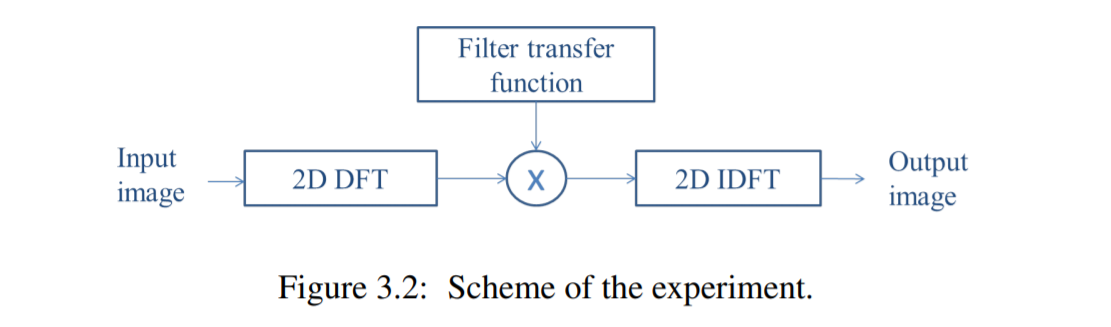

The transfer function of an LSI system equals to the DFT of the impulse response of the system but it can also be constructed directly in the DFT domain. For constructing the transfer function of an ideal filter, we can use Numpy.


## Example:

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Images/testpat1.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rows, cols = img.shape
print(rows, cols)

# create a low-pass filter, which passes half of the frequencies 
filter = np.zeros((rows, cols))
rows = 256
cols = 256
filter[rows//4 : rows//4 + rows//2, cols//4 : cols//4 + cols//2] = np.ones((rows//2, cols//2))
filter = ifftshift(filter)
plt.imshow(filter, cmap='gray')
plt.show()

# then pad it with zeros in the spatial domain and apply DFT 
h = np.real(ifft2(filter))
h_padded = np.zeros((511, 511))
h_padded[:256, :256] = h
plt.imshow(h_padded, cmap='gray') 
plt.show()
filter_padded = fft2(h_padded)
plt.imshow(np.abs(filter_padded), cmap='gray')
plt.show()

In [ ]:
# zero-pad the image as well
img_padded = np.zeros((511, 511))
img_padded[:256, :256] = img
plt.imshow(img_padded, cmap='gray')
plt.show()

In [ ]:
# multiply in the DFT domain
imgFT_padded = fft2(img_padded)
filt_imgFT = imgFT_padded * filter_padded

# apply inverse DFT and cut out the desired section - the section which contained the original images in the padded images
filt_img = np.real(ifft2(filt_imgFT))
plt.imshow(filt_img,cmap='gray')
plt.show()
filt_img = filt_img[:256, :256]
plt.imshow(filt_img,cmap='gray')
plt.show()

# comparison with linear convolution of img and h
conv_img=convolve2d(img, h, mode='full')
print("Maximum difference between linear and circular convolution:", np.amax(np.abs((conv_img[0:256,0:256]-filt_img))))
plt.imshow(conv_img[0:256,0:256]-filt_img, cmap='gray')
plt.show()

You can notice that the result of filtering is a complex matrix. Therefore, we need to apply *real()* or *abs(*) function on the result obtained after inverse transform. This operation is needed because of numerical errors that appear during the calculation of the impulse response, which cause complex values after IDFT calculation.

For calculation of the DFT, we assume that the signal is periodical. Therefore, the given procedure of multiplication in Fourier domain corresponds to the circular convolution. In 1D, circular or cyclic convolution is defined as:

\begin{equation}
\left(x_{N} * h\right)[n]=x_{N}[n] \circledast h_{N}[n]=\sum_{m=-\infty}^{\infty} h[m] \cdot x_{N}[n-m]=\sum_{m=-\infty}^{\infty}\left(h[m] \cdot \sum_{k=-\infty}^{\infty} x[n-m-k N]\right) \tag{3.09}
\end{equation}

If we extend our signals x[n] and h[n] to be periodical with a period $N$ (lets call these periodical signals $\tilde{x}[n]$ and $\tilde{h}[n]$), then the linear convolution of these signals is periodical, and one period of this periodical linear convolution corresponds to the circular convolution.
In 2D, we can write this **expression for circular convolution**:
\begin{equation}
y[m, n]=\sum_{i=0}^{M_{x}-1} \sum_{j=0}^{N_{x}-1} x[i, j] h\left[(m-i) \% M_{x},(n-i) \% N_{x}\right] \tag{3.10}
\end{equation}

where $\%$ denotes the modulus operator, $M_x$ and $N_x$ denote the dimensions of the image $x[i, j]$, with $ M_x > M_h$ and $N_x > N_h$. 

If we want to calculate the linear convolution using the computationally more efficient DFT (ie. FFT!), we have to reduce linear convolution to circular convolution. To achieve this, signals (or images) $x(i, j)$ and $h(i, j)$ need to be padded with zeros so that the dimensions of both of them are at least $(Mx + Mh −1) × (Nx +Nh −1)$. The desired result of the linear convolution is now within the calculated DFT matrix, which we can approach to by cutting off the extra values that do not contain the desired information. This cutting will depend on the way we padded our signals with zeros.

### **3.3.1 Problems**

1. Select one image from the USC-SIPI image database. Examine and describe the effect of: a) lowpass, b) high-pass, c) band-pass and d) band-stop filters on the image. Perform the filtering by direct
multiplication in the frequency domain.

In [ ]:
# Write-in your solution
url = "https://sipi.usc.edu/database/download.php?vol=misc&img=4.1.05"
img = skimage.io.imread(url)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

rows, cols = img.shape
print(rows, cols) 

img_padded = np.zeros((511, 511))
img_padded[:256, :256] = img
plt.imshow(img_padded, cmap='gray')
plt.show()
#niskopropusni
NP_filter = np.zeros((rows, cols))
rows = 256
cols = 256
NP_filter[rows//4 : rows//4 + rows//2, cols//4 : cols//4 + cols//2] = np.ones((rows//2, cols//2))
NP_filter = ifftshift(NP_filter)
plt.imshow(NP_filter, cmap='gray')
plt.show()

#visokopropusni
VP_filter = 1- NP_filter
plt.imshow(VP_filter, cmap='gray')
plt.show()

#band-pass
filter1 = np.zeros((rows, cols))
rows = 256
cols = 256
filter1[102:102+51,102:102+51] = np.ones((rows//5,cols//5))
filter = ifftshift(filter1)
filter2 = 1-filter1
BP_filter = filter - filter2
plt.imshow(BP_filter, cmap='gray')

plt.show()
#band-stop
BS_filter = 1- BP_filter
plt.imshow(BS_filter, cmap='gray')
plt.show()

#niskopropusni
h = np.real(ifft2(NP_filter))
h_padded = np.zeros((511, 511))
h_padded[:256, :256] = h
plt.imshow(h_padded, cmap='gray') 
filter_padded = fft2(h_padded)
plt.imshow(np.abs(filter_padded), cmap='gray')

# multiply in the DFT domain
imgFT_padded = fft2(img_padded)
filt_imgFT = imgFT_padded * filter_padded

# apply inverse DFT and cut out the desired section - the section which contained the original images in the padded images
filt_img = np.real(ifft2(filt_imgFT))
plt.imshow(filt_img,cmap='gray')
plt.show()
filt_img = filt_img[:256, :256]
plt.imshow(filt_img,cmap='gray')
plt.show()

#visokopropusni
h = np.real(ifft2(VP_filter))
h_padded = np.zeros((511, 511))
h_padded[:256, :256] = h
plt.imshow(h_padded, cmap='gray') 
filter_padded = fft2(h_padded)
plt.imshow(np.abs(filter_padded), cmap='gray')
# multiply in the DFT domain
imgFT_padded = fft2(img_padded)
filt_imgFT = imgFT_padded * filter_padded

# apply inverse DFT and cut out the desired section - the section which contained the original images in the padded images
filt_img = np.real(ifft2(filt_imgFT))
plt.imshow(filt_img,cmap='gray')
plt.show()
filt_img = filt_img[:256, :256]
plt.imshow(filt_img,cmap='gray')
plt.show()

#band_pass
h = np.real(ifft2(BP_filter))
h_padded = np.zeros((511, 511))
h_padded[:256, :256] = h
plt.imshow(h_padded, cmap='gray') 
filter_padded = fft2(h_padded)
plt.imshow(np.abs(filter_padded), cmap='gray')
# multiply in the DFT domain
imgFT_padded = fft2(img_padded)
filt_imgFT = imgFT_padded * filter_padded

# apply inverse DFT and cut out the desired section - the section which contained the original images in the padded images
filt_img = np.real(ifft2(filt_imgFT))
plt.imshow(filt_img,cmap='gray')
plt.show()
filt_img = filt_img[:256, :256]
plt.imshow(filt_img,cmap='gray')
plt.show()

#band_stop
h = np.real(ifft2(BS_filter))
h_padded = np.zeros((511, 511))
h_padded[:256, :256] = h
plt.imshow(h_padded, cmap='gray') 
filter_padded = fft2(h_padded)
plt.imshow(np.abs(filter_padded), cmap='gray')
# multiply in the DFT domain
imgFT_padded = fft2(img_padded)
filt_imgFT = imgFT_padded * filter_padded

# apply inverse DFT and cut out the desired section - the section which contained the original images in the padded images
filt_img = np.real(ifft2(filt_imgFT))
plt.imshow(filt_img,cmap='gray')
plt.show()
filt_img = filt_img[:256, :256]
plt.imshow(filt_img,cmap='gray')
plt.show()


Slika u frekvencijskoj domeni sastoji se od nižih frekvencija koje su u sredini slike te što se više udaljava os sredine, frekvencije postaju više. Koristivši to saznanje možemo konstruirati filtre u frekvencijskoj domeni. Naime, sve frekvencije koje ne želimo prigušimo u frekvencijskoj domeni množenjem s određenim filtrom tako da kod niskopropusnog filtra prigušimo visoke frekvencije, visokopropusnog niske frekvencije, pojasno propusnog visoke i niske frekvencije, a kod pojasne brane frekvencije između visokih i niskih.

# 3.4 Discrete cosine transform

Discrete cosine transform (DCT) is another orthogonal linear transform, which has certain properties that are important in specific applications. DCT is a real transform, which means that DCT coefficients of a real image are real numbers (as opposed to DFT).

One-dimensional (1D) DCT is defined as:

\begin{equation}
X[k]=\alpha(k) \sum_{n=0}^{N-1} x[n] \cos \frac{(2 n+1) k \pi}{2 N} \tag{3.11}
\end{equation}

where $α(k)$ denotes a normalization coefficient defined as From these two expressions we can derive a single expression for calculating the DCT in 1D:

\begin{equation}
X[k]=\sqrt{\frac{2-\delta[k]}{N}} \sum_{n=0}^{N-1} x[n] \cos \frac{(2 n+1) k \pi}{2 N} \tag{3.12}
\end{equation}

\begin{equation}
\alpha(k)=\left\{\begin{array}{ll}
\sqrt{\frac{1}{N}}, & k=0 \\
\sqrt{\frac{2}{N}}, & 1 \leq k< N 
\end{array}\right.
\end{equation}

2D DCT is defined as:

\begin{equation}
X\left[k_{1}, k_{2}\right]=\alpha\left(k_{1}, k_{2}\right) \sum_{n_{1}=0}^{N_{1}-1} \sum_{n_{2}=0}^{N_{2}-1} x\left(n_{1}, n_{2}\right) \cos \frac{\left(2 n_{1}+1\right) k_{1} \pi}{2 N_{1}} \cos \frac{\left(2 n_{2}+1\right) k_{2} \pi}{2 N_{2}} \tag{3.13}
\end{equation}

Here, normalizing is obtained by multiplication with a normalization coefficient $α(k1, k2)$, defined as $α×α^T$



In the following example [scipy.fft.dct](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.dct.html#scipy.fft.dct) and [scipy.fft.idct](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.idct.html) are used.

## Example:

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Images/klis2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

imgCT=dct(img) # Calculate DCT
imgO=idct(img) # Calculate IDCT
# the values aren't complex

# 3.5 DCT and image compression
As we could have seen in the previous chapter, most of the energy is distributed in the low-frequency components of the spectrum. This is true only when we’re talking about the images displaying natural scenes. This property of DCT can be used for image compression which can be separated in three steps: DCT transform,
basis restriction and coefficient quantization. Unlike before, the transform is not performed once for the whole image, but block-wise - with block sizes $8× 8$ or $16× 16$. Then, for each block DCT is calculated and and the coefficients are quantized. Quantized coefficients are are then coded with Huffman algorithm.

Here, we give an example for calculating the DCT transform of the image img in blocks 8×8.



## Example:

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Images/salona.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(img.shape)
img = cv2.resize(img, (616, 304), cv2.INTER_LINEAR) 
img = np.reshape(img, (img.shape[0]//8, 8, img.shape[1]//8, 8))

imgDCT = dct(dct(img, axis=1), axis=3)
imgIDCT = idct(idct(imgDCT, axis=1), axis=3)

imgIDCT = np.reshape(imgIDCT, (img.shape[0]*8, img.shape[2]*8))
plt.imshow(imgIDCT, cmap='gray')

Now we need to apply the basis restriction to each block of the calculated transform. If the variable *mask* is a matrix that contains the basis restriction mask, the restriction can be performed using the following code:

In [ ]:
#mask = np.ones((8,8))
mask = np.zeros((8,8))
mask[:2,:2] = np.ones((2,2))
print(mask)
mask = np.reshape(mask, (1, 8, 1, 8))
imgDCT = dct(dct(img, axis=1), axis=3)
imgDCT = imgDCT * mask
imgIDCT = idct(idct(imgDCT, axis=1), axis=3)

imgIDCT = np.reshape(imgIDCT, (img.shape[0]*8, img.shape[2]*8))
plt.imshow(imgIDCT, cmap='gray')
plt.show()

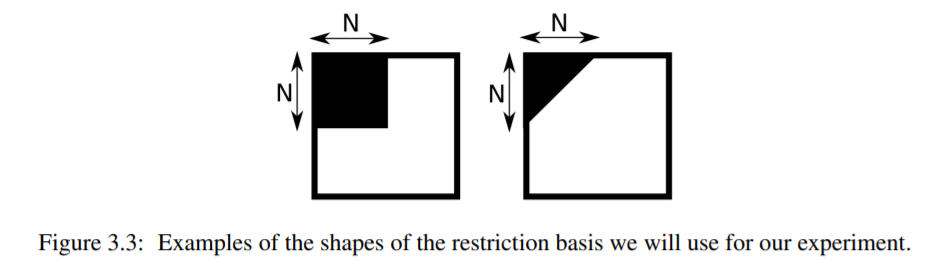

### **3.5.1 Problems**

1. Write the function that calculates an 8 × 8 matrix which will represent the basis restriction mask. Input parameters of the functions should be: 1) shape of the mask, and 2) size of the mask. The examples of the triangle and the square masks are given in Fig. 3.3, where the dark pixels represent the value 1, and the bright pixels represent the value 0. N denotes the size of the mask.

In [ ]:
# Write-in your solution
def restriction_mask(mask_shape, mask_size):
  mask = np.zeros((8,8))
  if mask_shape == "square":
    mask[:mask_size,:mask_size] = np.ones((mask_size,mask_size))
    mask = np.reshape(mask, (1, 8, 1, 8))
  if mask_shape == "triangle":
    mask[:mask_size,:mask_size] =1-np.triu(np.ones((mask_size,mask_size)), k=1)[::-1]
    mask = np.reshape(mask, (1, 8, 1, 8))
      
  print(f"\n{mask_shape} mask:\n\n{mask}")
  return mask

mask = restriction_mask("square",4)
mask = restriction_mask("triangle",4)

2. Select one image from the USC-SIPI image database. Calculate the DCT with a block size 8×8 and apply the basis restriction. Display the original and the reconstructed image.

In [ ]:
# Write-in your solution
url = "https://sipi.usc.edu/database/download.php?vol=misc&img=7.1.03"
img = skimage.io.imread(url)
plt.imshow(img, cmap='gray')
plt.show()

print(img.shape)
img = np.reshape(img, (img.shape[0]//8, 8, img.shape[1]//8, 8))

mask = restriction_mask("square",3)
imgDCT = dct(dct(img, axis=1), axis=3)
imgDCT = imgDCT * mask
imgIDCT = idct(idct(imgDCT, axis=1), axis=3)

imgIDCT = np.reshape(imgIDCT, (img.shape[0]*8, img.shape[2]*8))
plt.imshow(imgIDCT, cmap='gray')
plt.show()

3. Calculate the mean square error (MSE) of the original image compared to the image reconstructed in the previous task.


In [ ]:
# Write-in your solution
def MSE(img_1,img_2):
  MSE = np.square(np.subtract(img_1,img_2)).mean()
  print(f"\nMSE: {MSE}\n")

mse = MSE(img1,imgIDCT)

4. Try different masks for the basis restrictions and compare the reconstructed results (bot visually and by calculating the MSE with respect to the original image). What can you conclude?

In [ ]:
# Write-in your solution
url = "https://sipi.usc.edu/database/download.php?vol=misc&img=7.1.03"
img_tenk = skimage.io.imread(url)
img1 = img_tenk
plt.imshow(img_tenk, cmap='gray')
plt.show()

print("Mask1\n")
img = np.reshape(img1, (img1.shape[0]//8, 8, img1.shape[1]//8, 8))

mask1 = restriction_mask("square",4)
imgDCT = dct(dct(img, axis=1), axis=3)
imgDCT = imgDCT * mask1
imgIDCT = idct(idct(imgDCT, axis=1), axis=3)

imgIDCT1 = np.reshape(imgIDCT, (img.shape[0]*8, img.shape[2]*8))

mse = MSE(img1,imgIDCT1)

print("Mask2\n") 
img = np.reshape(img1, (img1.shape[0]//8, 8, img1.shape[1]//8, 8))

mask1 = restriction_mask("triangle",4)
imgDCT = dct(dct(img, axis=1), axis=3)
imgDCT = imgDCT * mask1
imgIDCT = idct(idct(imgDCT, axis=1), axis=3)

imgIDCT2 = np.reshape(imgIDCT, (img.shape[0]*8, img.shape[2]*8))
mse = MSE(img1,imgIDCT2)

print("Mask3\n")
img = np.reshape(img1, (img1.shape[0]//8, 8, img1.shape[1]//8, 8))

mask3 = restriction_mask("square",7)
imgDCT = dct(dct(img, axis=1), axis=3)
imgDCT = imgDCT * mask3
imgIDCT = idct(idct(imgDCT, axis=1), axis=3)

imgIDCT3 = np.reshape(imgIDCT, (img.shape[0]*8, img.shape[2]*8))
mse = MSE(img1,imgIDCT3)

print("Mask4\n")
img = np.reshape(img1, (img1.shape[0]//8, 8, img1.shape[1]//8, 8))

mask4 = restriction_mask("triangle",7)
imgDCT = dct(dct(img, axis=1), axis=3)
imgDCT = imgDCT * mask4
imgIDCT = idct(idct(imgDCT, axis=1), axis=3)

imgIDCT4 = np.reshape(imgIDCT, (img.shape[0]*8, img.shape[2]*8))
mse = MSE(img1,imgIDCT4)

# Plot the original, the noisy, and both filtered images
fig, axs = plt.subplots(4, 2, figsize=(16, 16))
axs[0, 0].imshow(img_tenk, cmap='gray')
axs[1, 0].imshow(img_tenk, cmap='gray')
axs[2, 0].imshow(img_tenk, cmap='gray')
axs[3, 0].imshow(img_tenk, cmap='gray')
axs[0, 1].imshow(imgIDCT1, cmap='gray')
axs[1, 1].imshow(imgIDCT2, cmap='gray')
axs[2, 1].imshow(imgIDCT3, cmap='gray')
axs[3, 1].imshow(imgIDCT4, cmap='gray')
fig.show()

Srednje kvadratno odstupanje obrnuto je proporcionalno veličini maske.  Što je veličina make veća to je bolja vizualna kvaliteta slike te je srednje kvadratno odstupanje manje. Kvadrtana maska ima manje MSE od trokutaste jer ima dvostruko više jedinica iz čega možemo zaključiti da za istu veličinu maske primjena kvadrtne daje kvalitetniju rekonstruiranu sliku. Zaključno, iz MSE je moguče odreiti kvalitetu slike.

5. Calculate MSE for the case when, besides the basis restriction, we also perform the coefficient quantization.


In [ ]:
# Write-in your solution
url = "https://sipi.usc.edu/database/download.php?vol=misc&img=7.1.03"
img = skimage.io.imread(url)
plt.imshow(img, cmap='gray')
plt.show()
print(img)

img = np.reshape(img, (img.shape[0]//8, 8, img.shape[1]//8, 8))

mask = restriction_mask("square",3)
imgDCT = dct(dct(img, axis=1), axis=3)
imgDCT = imgDCT * mask
imgIDCT = idct(idct(imgDCT, axis=1), axis=3)

imgIDCT = np.reshape(imgIDCT, (img.shape[0]*8, img.shape[2]*8))
plt.imshow(imgIDCT, cmap='gray')
plt.show()

**WRITE YOUR ANSWERS HERE**